<h1> Zadanie 1 </h1>

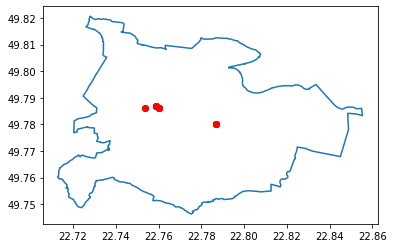

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

gra = open(r'przemyslGranice.geojson')
gran = gra.read()
granice = json.loads(gran)

lista = granice['features'][0]['geometry']['coordinates'][0]

args = []
vals = []
for i in lista:
    args.append(i[0])
    vals.append(i[1])
    
czuj = open(r'Czujniki_Przemysl.geojson')
czujn = czuj.read()
czujniki = json.loads(czujn)

czujargs = []
czujvals = []
for i in czujniki['features']:
    czujargs.append(i['geometry']['coordinates'][0])
    czujvals.append(i['geometry']['coordinates'][1])

plt.plot(args, vals)
plt.plot(czujargs, czujvals, 'ro')

plt.show()


<h1> Zadanie 1 wykonanie alternatywne </h1>

ipykernel_launcher:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


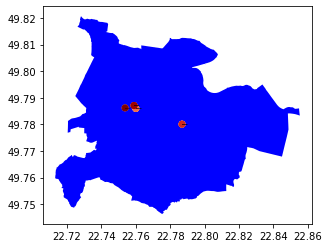

In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd

granice = gpd.read_file('przemyslGranice.geojson')
punkty = gpd.read_file('Czujniki_Przemysl.geojson')

plt.figsize = (20, 10)

ax = granice.plot(color='blue')

for idx, row in punkty.iterrows():
    coordinates = row['geometry'].coords.xy
    x, y = coordinates[0][0], coordinates[1][0]
    ax.annotate(row['id'], xy=(x, y), xytext = (x,y), fontsize = 1 )

z = punkty.plot(ax=ax, scheme='quantiles', cmap='OrRd')
ff = z.get_figure()
ff.savefig('miasto.svg')
ff.show()

# Plik powinien się zapisać w katalogu zadania

<h1> Zadanie 2 mój mały, nadpoczęty projekt na któy mam mało czasu niestety </h2>

In [ ]:
import numpy as np

def zabronienie(table, i):
    if i//9-1 >= 0 and i%9-1 >= 0:
        if gracz[i//9-1][i%9-1] == (-3 and 0):
            gracz[i//9-1][i%9-1] = -3 
    if i//9-1 >= 0:
        if gracz[i//9-1][i%9] == (-3 and 0):
            gracz[i//9-1][i%9] = -3 
    if i//9-1 >= 0 and i%9+1 < 9:
        if gracz[i//9-1][i%9+1] == (-3 and 0):
            gracz[i//9-1][i%9+1] = -3 
    if i%9-1 >= 0:
        if gracz[i//9][i%9-1] == (-3 and 0):
            gracz[i//9][i%9-1] = -3 
    if i%9+1 < 9:
        if gracz[i//9][i%9+1] == (-3 and 0):
            gracz[i//9][i%9+1] = -3 
    if i//9+1 < 9 and i%9-1 >= 0:
        if gracz[i//9+1][i%9-1] == (-3 and 0):
            gracz[i//9+1][i%9-1] = -3 
    if i//9+1 < 9:
        if gracz[i//9+1][i%9] == (-3 and 0):
            gracz[i//9+1][i%9] = -3 
    if i//9+1 < 9 and i%9+1 < 9:
        if gracz[i//9+1][i%9+1] == (-3 and 0):
            gracz[i//9+1][i%9+1] = -3 

gracz = np.zeros([9,9])
bot = np.zeros([9,9])
strzalGracz = np.zeros([9,9])
strzalBot = np.zeros([9,9])


def reset():
    global gracz; global bot; global strzalGracz; global strzalBot
    gracz = np.zeros([9,9])
    bot = np.zeros([9,9])
    strzalGracz = np.zeros([9,9])
    strzalBot = np.zeros([9,9])


# 0: Nie użyto ruchu "-"; -1: Pudło "O"; -2: Trafienie "X" 1 do 10: ID statków (Od największego do najmniejszych)
placement = {0:'-', -1:'O', -2:'X', -3:'z', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9', 10:'10'}
gra = {0:'-', -1:'O', -2:'X', 1:'G', 2:'D', 3:'D', 4:'S', 5:'S', 6:'S', 7:'M', 8:'M', 9:'M', 10:'M'}
dlugosc = {'G':4, 'D':3, 'S':2, 'M':1}

rotacja = {'v':0, 'h':1}
litery = ['a','b','c','d','e','f','g','h','i','j']
numLitery = {'a':1,'b':2,'c':3,'d':4,'e':5,'f':6,'g':7,'h':8,'i':9,'j':10}

def pomoc():
    print("By umiescić statek w tablicy należy umiescić 3 zmienne bez spacji:\n\
          - litera kolumny,\n\
          - numer wiersza\n\
          - rotację (pionowo: 'v', poziomo: 'h')\n\
          Dodatkowo, numer wiersza i litera kolumny są jakby lewym górnym rogiem podczas operacji kładzenia statku\n\
          To oznacza, że jak dajemy statek pionowo, to kolejne jego fragmenty są kładzione w macierzy od góry do dołu, a jakj poziomo to od lewej do prawej.\n\
          W grze jest 10 statków: 1 o rozmiarze 4, 2 o rozmiarze 3, 3 o rozmiarze 2 i 4 o rozmiarze 1\n\
        Są one w tym skrypcie kładzione po kolei, od największego do najmniejszych.\n\
        Statki nie mogą nachodzić na siebie oraz ze sobą bezporednio sąsiadować\n\
        Przykładowo, aby umiescić statek na polu a5 pionowo, piszemy 'a5v'\n\
        Zdaję sobię sprawe, że dawanie rotracji dla statku 1-elementowego jest bezcelowe, poprawię to jak będę się tym kodem bawić bardziej późnej\n\
        Można teraz próbować!")

def gametableprint():
    print("\n   PLANSZA GRACZA          STRZAŁY GRACZA", end="\n\n")
    kolumna = (x for x in range(1, 10))
    print("", end="  ")
    for x in range(0,9): print(litery[x].title(), end = ' ')
    print("", end="      ")
    for x in range(0,9): print(litery[x].title(), end = ' ')
        
    print('')
    for i in range(0,9):
        kol = next(kolumna)
        print(kol, end = "")
        for j in range(0,9):
            print("", gra.get(gracz[i][j]), end = "")
        print("     ", end="")
        print(kol, end = "")
        for j in range(0,9):
            print("", gra.get(strzalGracz[i][j]), end = "")
        print("")

def placementtableprint():
    print("\n   Rozmieszczenie",end="\n\n")
    kolumna = (x for x in range(1, 10))
    print("", end="  ")
    for x in range(0,9): print(litery[x].title(), end = ' ')        
    print('')
    for i in range(0,9):
        kol = next(kolumna)
        print(kol, end = "")
        for j in range(0,9):
            print("", placement.get(gracz[i][j]), end = "")
        print("")
        
def rozmieszczenieCheck(identyfikacja, x, rot, tablica):
    if gra.get(identyfikacja) == 'G':
        
        if rotacja.get(rot) == 1:
            if x%9 > 5:
                return False
            else:
                if tablica[x//9][x%9] == 0 and tablica[x//9][x%9+1] == 0 and tablica[x//9][x%9+2] == 0 and tablica[x//9][x%9+3] == 0:
                    return True
                else: return False
        else:
            if x//9 > 5:
                return False
            else:
                if tablica[x//9][x%9] == 0 and tablica[x//9+1][x%9] == 0 and tablica[x//9+2][x%9] == 0 and tablica[x//9+3][x%9] == 0:
                    return True
                else: return False
                
    elif gra.get(identyfikacja) == 'D':
        
        if rotacja.get(rot) == 1:
            if x%9 > 6:
                return False
            else:
                if tablica[x//9][x%9] == 0 and tablica[x//9][x%9+1] == 0 and tablica[x//9][x%9+2] == 0:
                    return True
                else: return False
        else:
            if x//9 > 6:
                return False
            else:
                if tablica[x//9][x%9] == 0 and tablica[x//9+1][x%9] == 0 and tablica[x//9+2][x%9] == 0:
                    return True
                else: return False
        
    elif gra.get(identyfikacja) == 'S':
        
        if rotacja.get(rot) == 1:
            if x%9 > 7:
                return False
            else:
                if tablica[x//9][x%9] == 0 and tablica[x//9][x%9+1] == 0:
                    return True
                else: return False
        else:
            if x//9 > 7:
                return False
            else:
                if tablica[x//9][x%9] == 0 and tablica[x//9+1][x%9] == 0:
                    return True
                else: return False
    else:
        if tablica[x//9][x%9] == 0:
            return True
        else: return False
        
def rozmieszczenieInputCheck(y):
    z = list(map(str, y))
    try:
        z[1] = int(z[1])
    except:
        return False
    if z[0] not in litery or z[2] not in rotacja.keys():
        return False
    else:
        xyz = []
        xyz.append(int(numLitery.get(z[0])-1) + 9*(z[1]-1) )
        xyz.append(z[2])
        return(xyz)
    
def czyWygrana(macierz):
    if (1 or 2 or 3 or 4 or 5 or 6 or 7 or 8 or 9 or 10) in macierz:
        return False
    else:
        print("Wygrana!")
        return False
    
def rozmieszczenieZabronienia(tablica):
    
    # Okreslenie jest dla całosci tablicy ze względu na użycie tej funkcji w przypadku podnoszenia statku

    for i in range(0, 81):
        if tablica[i//9][i%9] != -3 and tablica[i//9][i%9] != 0:
            zabronienie(tablica, i)

# def rozmieszczeniebot(identyfikacja):
#     #Funkcja ma sprawiać, że statki bota są bliżej siebie, by nie doszło do szybkiego zapchania tablicy bota.
#     wolnekol = [0,1,2,3,4,5,6,7,8]
    
def rozmieszczenie(identyfikacja, x, rot):
    rozmiar = gra.get(identyfikacja); rozmiar = dlugosc.get(rozmiar)
    if rotacja.get(rot) == 1:
        for i in range(0, rozmiar):
            gracz[x//9][x%9+i] = identyfikacja
    else:
        for i in range(0, rozmiar):
            gracz[x//9+i][x%9] = identyfikacja
    
# Częsć do edytowania:
    
placementtableprint()
pomoc()
while True:
    for i in range(1,11):
        while True:
            u = input("Podaj pozycję dla statku "+placement.get(i)+": ")
            if rozmieszczenieInputCheck(u) != False:
                u = rozmieszczenieInputCheck(u)
                if rozmieszczenieCheck(i, u[0], u[1], gracz) == True:
                    rozmieszczenie(i, u[0], u[1])
                    rozmieszczenieZabronienia(gracz)
                    placementtableprint()
                    break
            print("Podano niepoprawnie dane")
    break
                


